# Chapter 3 | Neural Nets Foundations
> If You are Feeling Intimidated Like Me, Lets Work Through This Together

>Checkout this notebook in [colab](https://colab.research.google.com/github/nglillywhite/blog/blob/main/posts/2022-12-26-Fastai%20Chapter%203.ipynb)

This chapter focuses on understanding the absolute bare bones fundamentals of how deep learning works. In particular the individual calculations that are being done at each and every 'artificial neuron' of any deep learning network that we build. I'm certainly not from a math background and am generally intimidated but intrigued by learning math like this. I think I have shaky foundational math understanding but I'm hoping working through this course in great detail will bolster these core concepts and I can build on them. Despite my enjoyment of math in school, I did only the general curriculum in my final two years because the math teachers in my school were able to induce a coma purely via the audio of their voice. I have no doubt they were well intentioned people but many were phoning in the days and I wasn't willing to spend half of my school day with them. I'm paying the price for it now having to re-learn these concepts but maybe its for the best, if they'd explained that $y=mx+b$, derivatives, and quadratics could detect cancers and make self driving cars I probably would have been a more passionate student. I feel very much a product of the "[Mathematician's Lament](https://www.maa.org/external_archive/devlin/LockhartsLament.pdf)" that is referenced in chapter 1 of the book. Its a lovely read and I took many lessons away from the write-up, not only in how I want to teach things going forward but also a strong emotional response to how something as incredible as math is ruined and tarnished because of how its taught. Think of where we could be, but nonetheless this blog is about chapter 3 of the fastai course, not math education.

Nonetheless here I am, and in the spirit of the "Sidebar: Tenacity and Deep Learning" from the book, I'm hoping that writing this blog and working through the content is a explicit evidence of success for me being both tenacious, and re-learning my math roots.

## Main Topics

The main concepts I want to have a 'mechanistic' & intuitive feeling for after this chapter are:

 - ReLu
 - Matrix Multiplication
 - Tensors
 - Gradient Descent
 
Hopefully after reading this blog you also feel comfortable with these important tools and feel as comfortable as I intend to be implementing and discussing these core concepts.

As mentioned in the lecture, this chapter has different content in the book from the lecture and I'd like to work through both, I'm firstly going to follow along the lecture with Jeremy and re-write & create the functions and tools he builds, barring the excel work which I'd like to re-write in python here, I will then work through the book content.

## Lecture Content

### Timm Module

Jeremy first talks through improving his pet classifier from the previous lesson, in particular having a look at different architectures and using the 'timm' library for vision model architectures. Lets have a look at the timm module and whats available

In [1]:
import timm

len(timm.list_models()), timm.list_models()[:20]

(964,
 ['adv_inception_v3',
  'bat_resnext26ts',
  'beit_base_patch16_224',
  'beit_base_patch16_224_in22k',
  'beit_base_patch16_384',
  'beit_large_patch16_224',
  'beit_large_patch16_224_in22k',
  'beit_large_patch16_384',
  'beit_large_patch16_512',
  'beitv2_base_patch16_224',
  'beitv2_base_patch16_224_in22k',
  'beitv2_large_patch16_224',
  'beitv2_large_patch16_224_in22k',
  'botnet26t_256',
  'botnet50ts_256',
  'cait_m36_384',
  'cait_m48_448',
  'cait_s24_224',
  'cait_s24_384',
  'cait_s36_384'])

There are a lot of models, almost ~1000 which is kind of nuts, looks like its certainly beefed up by different sizes of what I think is the same architecture structure, lets get a model down and have a look at the architecture.

In [2]:
resnet18 = timm.models.resnet18()
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act1): ReLU(inplace=True)
      (aa): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, m

Ok so I've brought down a 'tiny' model (in the scheme of todays models which have millions of parameters) called resnet16 which I used on my shark classifier in chapter 2 and the resnet architecture is what Jeremy references in the lecture.

It looks like there are many 'Sequential' layers with 'BasicBlocks' inside them which then have a bunch of individual 'submodules' if we copy the language from the model.get_submodule() API which we're about to use. Lets now have a look at a particular submodule. The get_submodule() method allows us to step down the 'tree' and 'branches' of the layers with a dot notation. We shall step all the way down to a leaf, take particular note of the branch names contained within the smooth brackets '()'. First we go via the "Layer1" layer, into the first BasicBlock which has the notation of '(O)', I'm guessing because the layer is an array of BasicBlocks, the first index being 0, then I'm going to pick the BatchNorm2d submodule which has the notation of '(bn1)' within the brackets.

In [3]:
layer = resnet18.get_submodule("layer1.0.bn1")
list(layer.parameters())

[Parameter containing:
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        requires_grad=True)]

OK so we've got a couple of tensors, one set to all ones and another set to all zeroes, lets have a look at the doc to see if there's any hints.

In [4]:
from torch.nn import BatchNorm2d

BatchNorm2d?

Init signature:
BatchNorm2d(
    num_features: int,
    eps: float = 1e-05,
    momentum: float = 0.1,
    affine: bool = True,
    track_running_stats: bool = True,
    device=None,
    dtype=None,
) -> None
Docstring:     
Applies Batch Normalization over a 4D input (a mini-batch of 2D inputs
with additional channel dimension) as described in the paper
`Batch Normalization: Accelerating Deep Network Training by Reducing
Internal Covariate Shift <https://arxiv.org/abs/1502.03167>`__ .

.. math::

    y = \frac{x - \mathrm{E}[x]}{ \sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta

The mean and standard-deviation are calculated per-dimension over
the mini-batches and :math:`\gamma` and :math:`\beta` are learnable parameter vectors
of size `C` (where `C` is the input size). By default, the elements of :math:`\gamma` are set
to 1 and the elements of :math:`\beta` are set to 0. The standard-deviation is calculated
via the biased estimator, equivalent to `torch.var(input, unbiased=False)`

Ok deadset I'm not sure what a lot, if not all of this means, but there's a nice link to the paper that proposed this submodule. Maybe I'll revisit this later or what I'm guessing is that we will discuss batch normalisation as part of the course. Nonetheless, credit due to the pytorch team for awesome docs and references. I'm certainly feeling comfortable picking apart a model and submodules to then research or understand the peices. And to Jeremy's point, it looks like each module is just tensors which I'm assuming get matrix multiplied.

Lets have a look at another one

In [5]:
layer = resnet18.get_submodule("layer1.0.conv2")
list(layer.parameters())

[Parameter containing:
 tensor([[[[-0.1708, -0.0008,  0.0283],
           [ 0.0404, -0.0414,  0.0004],
           [-0.0582,  0.0575,  0.0221]],
 
          [[ 0.0625, -0.0453, -0.0501],
           [ 0.0574, -0.0478,  0.0110],
           [-0.0031, -0.0606,  0.0476]],
 
          [[-0.0282, -0.0254,  0.0456],
           [ 0.1134, -0.1320,  0.0408],
           [-0.0691, -0.0602,  0.0513]],
 
          ...,
 
          [[-0.0202, -0.0382, -0.0890],
           [ 0.0555,  0.0035, -0.0764],
           [-0.0448,  0.0637, -0.0027]],
 
          [[-0.0301, -0.0475, -0.0891],
           [-0.0582, -0.0620, -0.0160],
           [ 0.0097,  0.0429, -0.0588]],
 
          [[-0.1014,  0.0125, -0.0374],
           [ 0.0455,  0.0338,  0.0002],
           [-0.0432, -0.0051, -0.0248]]],
 
 
         [[[ 0.0417, -0.0425, -0.0326],
           [-0.0089, -0.0420, -0.0853],
           [-0.0394, -0.0970, -0.0747]],
 
          [[ 0.0112,  0.0069, -0.0039],
           [-0.0214, -0.0187, -0.0827],
           [-0.0

Ok lets stop that, this thing is big. But nonetheless its interesting to see the different shapes and values, the batch norm module had zeroes and ones, this one seems to have all sorts of values and the shape is very different.

As Jeremy mentions, apparently these numbers can figure out if a dog is a basset hound or not, or in our previous example, a great white shark or a hammerhead. However this isn't clear at this time. Again as Jeremy mentions, machine learning is the act of fitting a function to data, lets investigate this further.

### How Do We Fit a Function to Data

Lets first build a general quadratic equation and plot it. I don't actually have an intuitive feeling for what makes this a 'quadratic' but again in the spirit of 80% do and 20% study, I'm going to soldier on to see the 'ball game' played out and circle back later to solidfy my theory as part of the 20% reading principle outlined in Radek's Metalearning book which I love. Note to Radek, I'm trusting you that this is a good plan, its working so far but as a product of school doing the opposite, I feel very conflicted moving on without actually 'knowing'.


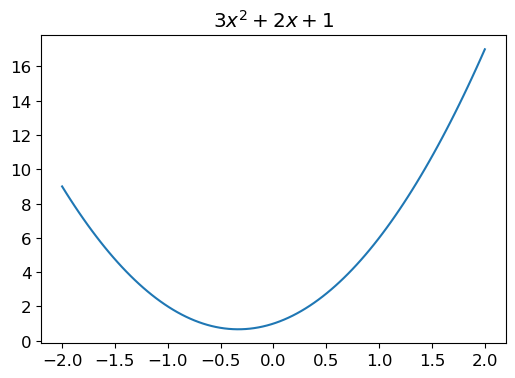

In [6]:
from fastbook import plot_function

def f(x): return 3*x**2 + 2*x + 1

plot_function(f, title="$3x^2 + 2x + 1$")

This f(x) function is nice to plot that particular function but it'd be nice to be able to play with the parameters, so lets define a quad() function where we can pass in what we like.

Also functionally these two definitions of a function are the same that I've written below, its just a nice python syntax to be able to write it on one line but its not very common in the general python universe.

In [7]:
def quad(a,b,c,x): return a*x**2 + b*x + c

def quad(a,b,c,x):
    return a*x**2 + b*x + c

In [8]:
quad(3,2,1,1.5)

10.75

Lets introduce as Jeremy does partial functions, he describes it as something along the lines of 'fixing' part of a function. I've thought of it as making a modified function from another function but his description is simpler.

### Partial Functions

In [9]:
from functools import partial

def mk_quad(a,b,c): return partial(quad,a,b,c)
f = mk_quad(3,2,1)
f(1.5)

10.75

In [10]:
from fastai.torch_core import doc

doc(partial)

The [python docs themselves are quite useful](https://docs.python.org/3/library/functools.html#functools.partial) at describing partials. For example, "Return a new partial object which when called will behave like *func* called with the positional and keyword arguments."

"The partial() is used for *partial function application* which "freezes" some portion of a function's arguements and keywords, resulting in a new object with a simplified signature."

Looks like Jeremy is more accurate, closer to the original python docs & its probably a better analogy of partial objects. My understanding is improved and I'll stop saying function from another function and start espousing something similar to the docs & Jeremy.

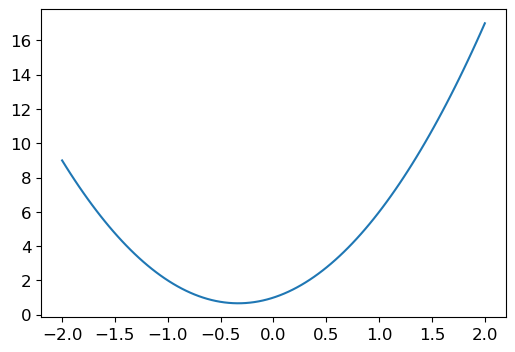

In [11]:
plot_function(f)

### Adding Noise to Our Perfect Functions

Lets now make some 'real' looking data,  we can add some noise to this function to more closely represent what data we're more likely to spot out in the hypothetical real world where the generator function of our data is perfect like this but we also live in the same world with innacurate measuring devices.

### Nassim Taleb is an Awesome Writer

Side note, the book "Fooled by Randomness" and "Black Swan" by Nassim Taleb are genuinely inspiring works that made me think and behave about and in the world differently. In particular Nassim introduces the concept of these 'invisible' generators that create the randomness in our world, the main problem is that we only ever observe a sample from these generators. Despite 'long' time frames relative to our lives, ie having data over 20 years, that simply might be an insufficient sample from the 'generator' to make any worthwhile inference of what the actual likelihood of your observations actually are. Irrelevant to the python we're writing right now but when imaginging this hypothetical world where we observe this perfect function but only see a noisy version, I thought I'd share some of my favourite books.

In [13]:
from numpy.random import normal, seed, uniform
import numpy as np

np.random.seed(42)

def noise(x, scale): return normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x, mult)) + noise(x,add)

Lets investigate each of the variables that Jeremy instantiates in the next few lines. I want to understand what each method is doing

In [24]:
doc(normal)

Ok so the normal function will draw random samples from a normal distribution, we have a scale and size variable which set the standard deviation and number of outputs we'd like

In [25]:
# We can see 10 samples which are taken from a normal distribution with a standard deviation of 0.3

normal(scale=.3,size=10)

array([-0.13902531, -0.13971893,  0.07258868, -0.57398407, -0.51747535, -0.16868626, -0.30384934,  0.0942742 , -0.27240722, -0.42369111])

In [26]:
import torch

torch.linspace?

Docstring:
linspace(start, end, steps, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Creates a one-dimensional tensor of size :attr:`steps` whose values are evenly
spaced from :attr:`start` to :attr:`end`, inclusive. That is, the value are:

.. math::
    (\text{start},
    \text{start} + \frac{\text{end} - \text{start}}{\text{steps} - 1},
    \ldots,
    \text{start} + (\text{steps} - 2) * \frac{\text{end} - \text{start}}{\text{steps} - 1},
    \text{end})


From PyTorch 1.11 linspace requires the steps argument. Use steps=100 to restore the previous behavior.

Args:
    start (float): the starting value for the set of points
    end (float): the ending value for the set of points
    steps (int): size of the constructed tensor

Keyword arguments:
    out (Tensor, optional): the output tensor.
    dtype (torch.dtype, optional): the data type to perform the computation in.
        Default: if None, uses the global default dtype (see torch.g

torch.linspace looks like a really nice way to build a tensor that I think is 'linearly' spaced out based on the start,stop, and steps variables you provide. So below we start from -2, go all the way to 2, and add 20 steps

In [27]:
test = torch.linspace(-2,2,steps=20)
test, test.shape

(tensor([-2.0000, -1.7895, -1.5789, -1.3684, -1.1579, -0.9474, -0.7368, -0.5263, -0.3158, -0.1053,  0.1053,  0.3158,  0.5263,  0.7368,  0.9474,  1.1579,  1.3684,  1.5789,  1.7895,  2.0000]),
 torch.Size([20]))

Jeremy also runs a '[:,None]' indexation on this linspace which seems like a cool trick to do something but I'm not quite sure what. It look like he wants all of the columns, hence the ';' semi-colon which gives you all but I'm not sure what the None command does.

In [28]:
test[:,None], test.shape

(tensor([[-2.0000],
         [-1.7895],
         [-1.5789],
         [-1.3684],
         [-1.1579],
         [-0.9474],
         [-0.7368],
         [-0.5263],
         [-0.3158],
         [-0.1053],
         [ 0.1053],
         [ 0.3158],
         [ 0.5263],
         [ 0.7368],
         [ 0.9474],
         [ 1.1579],
         [ 1.3684],
         [ 1.5789],
         [ 1.7895],
         [ 2.0000]]),
 torch.Size([20]))

Ok so it looks like it transposes the tensor from being a single row with many columns to being one column with many rows. I think my language of 'rows' and 'columns' is incorrect, this is simply a data table / dataframe way of thinking and tensors are fundamentally different so I need to figure out better language but I'm hoping we're at a simple enough state where this makes sense.

In [29]:
add_noise(f(test),.3,1.5),add_noise(f(test)[:,None],.3,1.5)

(tensor([14.0650,  6.8087,  5.2557,  1.7704,  0.0466,  0.7778,  0.0653,  2.4518,  1.0627, -1.8938,  1.5054,  2.4260,  1.8566,  3.7182,  8.5125,  6.0473,  8.6819,  4.3318,  9.0302, 19.4673],
        dtype=torch.float64),
 tensor([[ 7.3767],
         [ 7.1719],
         [ 5.7720],
         [ 1.7108],
         [ 2.1533],
         [ 1.7766],
         [ 2.5033],
         [ 1.5059],
         [-0.0546],
         [ 1.4334],
         [ 1.5242],
         [ 4.2746],
         [ 1.7996],
         [ 5.5367],
         [ 0.6079],
         [ 6.9520],
         [10.0430],
         [10.9848],
         [14.5838],
         [ 6.5115]], dtype=torch.float64))

Ok so it looks like the same kind of data but transposed as we saw before

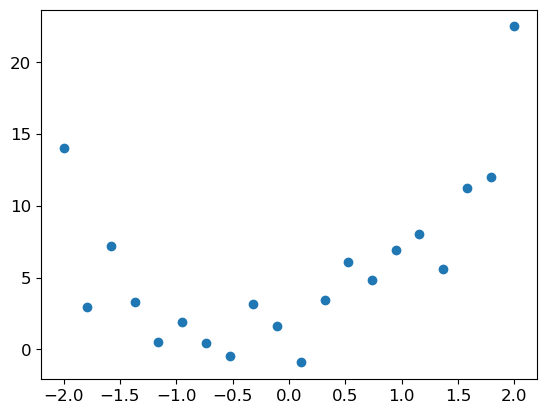

In [35]:
from matplotlib import pyplot as plt

x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.3, 1.5)
plt.scatter(x,y)

Lets try it without the transposing

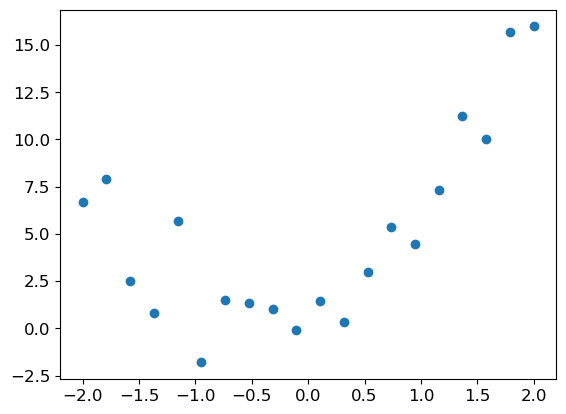

In [36]:
x = torch.linspace(-2,2,steps=20)
y = add_noise(f(x),0.3,1.5)
plt.scatter(x,y)

Ok looks the same, Jeremy not sure why we did this transposing of a 1d tensor but its certainly a neat trick. Lets move on and start playing with some parameters and Ipython interactivity

In [37]:
from ipywidgets import interact

@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a,b,c):
    plot_function(mk_quad(a,b,c))
    plt.scatter(x,y)
    

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

Now if you're reading on quarto, I recognise that you won't be able to play with the plot I've written above so I've re-written a plot function command with Altair so that you can play around with it on the blog.

In [67]:
import pandas as pd
import altair as alt

def plot_altair(a=1.5,b=1.5,c=1.5, title="$3x^2 + 2x + 1$"):
    a, b, c = 1.5, 1.5, 1
    f = mk_quad(a,b,c)
    x = torch.linspace(-2,2,steps=20)
    y = add_noise(f(x),0.3,1.5)
    data = pd.DataFrame({"x":x.numpy(), "y":y.numpy()})
    scatter = alt.Chart(data).mark_point().encode(
        x='x:Q',
        y='y:Q'
    )

    f = mk_quad(a,b,c)

    selector_a =  alt.selection_single(name="selector_a", 
                                    fields=['a'],  
                                    bind=alt.binding_range(min=0, max=3, step=0.1, name='A'),
                                    init={'a': a,}) 
    selector_b = alt.selection_single(name="selector_b",
                                    fields=['b'], 
                                    bind=alt.binding_range(min=0, max=3, step=0.1, name='B'),
                                    init={'b': b})
    # selector_c = alt.selection_single(name="selector_c",
    #                                 fields=['c'], 
    #                                 bind=alt.binding_range(min=0, max=3, step=0.1, name='C'),
    #                                 init={'c': c})


    line = alt.Chart(pd.DataFrame({"x":x.numpy(),"y":1,"c":c})).mark_line(color="red").encode(
        x='x',
        y='y',
    ).transform_calculate(
        y="((selector_a.a*pow(datum.x,2) + selector_b.b*datum.x)) + datum.c").properties(title=title).add_selection(selector_b).add_selection(selector_a)

    return (line + scatter)

plot_altair()

alt.LayerChart(...)

Also I know I've not given you the bias term to play with here or "c" for you to adjust. For whatever reason altair absolutely throws a fit if I change the "datum.c" to "selector_c.c" despite them supposedly being the same values. The function line plot goes absolutely haywire and I have not been able to troubleshoot it and playing with "a" and "b" still hammers home the point of seeing the 'fit' of the line dependent on these values.

### Adding a Loss Function
As Jeremy mentions, if we think back to Arthur Samuel from the first chapter, we want some automatic way to measure how well we've fit our function to the data, this would be our loss function. A simple and popular metric is Mean Squared Error (MSE) which is calculated by averaging the squared error of all the predictions of your model. Here is a python implementation below.

In [50]:
# from the lecture

def mse(predictions, actuals): return ((predictions-actuals)**2).mean()

In [57]:
@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a,b,c):
    f = mk_quad(a,b,c)
    loss = mse(f(x),y)
    plot_function(f, title=f"Mean Squared Error Loss: {loss}")
    plt.scatter(x,y)
    

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

Again if you're on quarto, you won't be able to play with the interactive pyplot graph here where you can see the loss change as the parameters are modified. There's also no way to dynamically change labels in Altair to my knowledge from a few stack overflow and github question. I'm going to replot our interactive graph with an example title that matches the pyplot so you can follow along without bringing down my notebook. If you wanted to see the magic values change and really have this sink in, please bring down the notebook or open it in colab & play with the plots ☺.

In [66]:
plot_altair(title="Mean Squared Error Loss: 3.1498 ")

alt.LayerChart(...)

### Derivatives, Rate of Change, Gradients

At this point it should be clear that you can muck around with these variables to fit this function line to our data depending on the a,b,c terms. We can manually play around with them and see the MSE or loss function improve or get worse. When doing this by hand, its a manual activity and we're checking the number go up or down but if we wanted to 'Arthur Samuel' style automate this process, we can use derivatives.

The way that I have understood derivates previously is that they help you explain the 'rate of change' for a function at any point. This relates to the gradient of a point on the curve since the gradient will tell me for any point on a function how much y will change if I change x, but because we don't have a linear function, this gradient changes a lot as we move along the curve. Derivatives let me figure out this gradient at any point.

Now this is a naive and likely wrong way of explaining derivatives, its just me writing out my thoughts and shaky foundations as they are currently. However the high level concept of derivatives being 'a way of knowing the correct direction to change a value in order to minimise our loss' is the important bit and I'm fairly confident that I'm not too wrong there. Take my explanations with a grain of salt as I am but this is the current nuance of how I think about derivatives, and gradients in relation to functions and minimising losses

Pytorch will calculate these gradients for us so we reliably can always know how to change our parameters in order to improve our loss function. I feel like we're starting to see the symphony of concepts come together here.

In [80]:
# from lecture

def quad_mse(params):
    f = mk_quad(*params)
    return mse(f(x), y)

quad_mse([1.5,1.5,1.5])

tensor(2.0430, dtype=torch.float64)

### 1D Tensors & functions_

Ok we're now playing with tensors again, and there's two important things to note, firstly how many dimensions our tensor has, in this case only 1 as we can only move along one dimension of the tensor. Unlike a 2D tensor like a dataframe where we could move along rows and columns, and a 3D tensor where we could move along columns, up or down rows, and depth-wise into different 'slices' of this dataframe. Hopefully that feels comfortable of the dimensions of a tensor. The other important note here is we are calling a *requires_grad_()* function which has an important *_* after the function name, this means to do the operation 'inplace' or on the object we're calling it with. If we call the function without the *_* it will return the output of the function but to a new object instead of the object we used to call the function, I'll show you below.

In [74]:
abc = torch.tensor([1.5,1.5,1.5])
abc

tensor([1.5000, 1.5000, 1.5000])

Lets modify 'abc' via the add function but also inspect abc after.

In [76]:
abc.add(5), abc

(tensor([6.5000, 6.5000, 6.5000]), tensor([1.5000, 1.5000, 1.5000]))

We can see the 'abc' tensor is still unchanged, despite calling the 'add()' function to it which returned a modified tensor with what we'd expect abc to look like after adding '5' to each value. Lets now try and inplace function.

In [77]:
abc.add_(5), abc

(tensor([6.5000, 6.5000, 6.5000]), tensor([6.5000, 6.5000, 6.5000]))

Now we can see that 'abc' has been modified as well as returning our modified tensor. Now [pytorch actually recommends *NOT* doing in-place modifications](https://pytorch.org/docs/stable/notes/autograd.html#in-place-operations-with-autograd) as its less memory efficient but for demonstration purposes or simplicity if you're not worried about taking the performance hit its totally ok. [Checkout this awesome stackoverflow Q&A](https://stackoverflow.com/questions/52920098/what-does-the-underscore-suffix-in-pytorch-functions-mean) to read more on the *_* underscore functions of pytorch and the pytorch recommendations.

Lets get back to using torch's mad grad functions.

In [88]:
abc = torch.tensor([1.5,1.5,1.5])
abc.requires_grad_()
abc

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [89]:
loss = quad_mse(abc)
loss

tensor(2.0430, dtype=torch.float64, grad_fn=<MeanBackward0>)

Ok so we've replicated our call before to quad_mse and can see the same loss, lets now calculate the gradients on our tensor by calling backward(), which is a reference to backpropagation or backprop.

In [93]:
loss.backward?

Signature:
loss.backward(
    gradient=None,
    retain_graph=None,
    create_graph=False,
    inputs=None,
)
Docstring:
Computes the gradient of current tensor w.r.t. graph leaves.

The graph is differentiated using the chain rule. If the tensor is
non-scalar (i.e. its data has more than one element) and requires
gradient, the function additionally requires specifying ``gradient``.
It should be a tensor of matching type and location, that contains
the gradient of the differentiated function w.r.t. ``self``.

This function accumulates gradients in the leaves - you might need to zero
``.grad`` attributes or set them to ``None`` before calling it.
See :ref:`Default gradient layouts<default-grad-layouts>`
for details on the memory layout of accumulated gradients.

.. note::

    If you run any forward ops, create ``gradient``, and/or call ``backward``
    in a user-specified CUDA stream context, see
    :ref:`Stream semantics of backward passes<bwd-cuda-stream-semantics>`.

.. note::

  

In [91]:
loss.backward()

Now its silently succeeded, but what its done is add a 'grad' attribute to our abc tensor, with each corresponding value of grad explaining how the values of the tensor 'abc' will change if we add to them.

In [92]:
abc.grad

tensor([0.0015, 0.2250, 0.3953])

Ok so with each of these gradients, we need to decrease our parameters in order to reduce our loss function as the gradients are positive, meaning if we add to them, the loss will get worse.

As Jeremy states, we want to add the 'negative' of our gradients by some small value as we don't want to leap too far along our function curve and overshoot the optimal value. We need to multiply our gradients by a 'learning rate', which is this small value that helps us move along the curve, the size of the learning rate changes how far along the curve we leap.

In [95]:
# our loss previously
loss

tensor(2.0430, dtype=torch.float64, grad_fn=<MeanBackward0>)

Note we disable the gradient calculation with torch.no_grad() since "abc.requires_grad" is true which means that anytime the tensor is used in a function, it calculates the gradients. We want to actually do this manually ourselves by updating abc by the learning and then re-calculating the loss.

Lets do this and see if our loss improves

In [96]:
learning_rate = 0.01

with torch.no_grad():
    abc -= abc.grad*learning_rate
    loss = quad_mse(abc)
    
loss

tensor(2.0409, dtype=torch.float64)

It got better! By an absolutely abysmal amount, maybe we need a bigger learning rate.... Or more compute, lets try a few iterations

In [97]:
learning_rate = 0.01

for iteration in range(15):
    with torch.no_grad():
        abc -= abc.grad*learning_rate
        loss = quad_mse(abc)
        print(f"The current loss is {loss}")

loss

The current loss is 2.0389189772360474
The current loss is 2.0369663885871843
The current loss is 2.0350602976519268
The current loss is 2.0332007599435213
The current loss is 2.031387810476578
The current loss is 2.0296212739311534
The current loss is 2.0279015750808718
The current loss is 2.0262280107856907
The current loss is 2.024601005141407
The current loss is 2.0230206668897206
The current loss is 2.0214867744911467
The current loss is 2.019999455730664
The current loss is 2.0185587881549756
The current loss is 2.0171645932529865
The current loss is 2.015816816414771


tensor(2.0158, dtype=torch.float64)

How awesome is this, we have a improving loss value because of these gradients being updated, our loss being calculated and being looped over again and again. This process is called **Optimisation using gradient descent**, we've done a very basic implementation but nonetheless this is a key term to solidify and refer back to in the future. Its a sensible name since we're *Optimising* our parameters in our tensor for our loss function using *gradients* to *descend* down to the lowest loss value.

### Rectified Linear Units | ReLu

As Jeremy noted, this is all well and good so far but it doesn't feel very likely that we can optimise for many real world datasets or observations since they'd have to fit a quadratic form to match the parameters we have to play with. If we introduce the ReLu, we can start to address this problem.

A relu has the form of $f(x) = max(0,x)$ with all values under 0 being clipped to 0, we do this with torch.clip(). This probably isn't the correct 'math' way to write it out but this is the useful illustration to me of anything at 0 or below being clipped and then returning x otherwise.

Lets first plot a ReLu with the function $y=mx+b$ and see what it looks like

In [111]:
torch.clip?

Docstring:
clip(input, min=None, max=None, *, out=None) -> Tensor

Alias for :func:`torch.clamp`.
Type:      builtin_function_or_method


Ok so clip is a nice alias for torch.clamp, lets checkout those docs

In [116]:
torch.clamp?

Docstring:
clamp(input, min=None, max=None, *, out=None) -> Tensor

Clamps all elements in :attr:`input` into the range `[` :attr:`min`, :attr:`max` `]`.
Letting min_value and max_value be :attr:`min` and :attr:`max`, respectively, this returns:

.. math::
    y_i = \min(\max(x_i, \text{min\_value}_i), \text{max\_value}_i)

If :attr:`min` is ``None``, there is no lower bound.
Or, if :attr:`max` is ``None`` there is no upper bound.


.. note::
    If :attr:`min` is greater than :attr:`max` :func:`torch.clamp(..., min, max) <torch.clamp>`
    sets all elements in :attr:`input` to the value of :attr:`max`.

Args:
    input (Tensor): the input tensor.
    min (Number or Tensor, optional): lower-bound of the range to be clamped to
    max (Number or Tensor, optional): upper-bound of the range to be clamped to

Keyword args:
    out (Tensor, optional): the output tensor.

Example::

    >>> a = torch.randn(4)
    >>> a
    tensor([-1.7120,  0.1734, -0.0478, -0.0922])
    >>> torch.clamp(a, m

We're using the 'min' variable to enforce every value being at least 0.

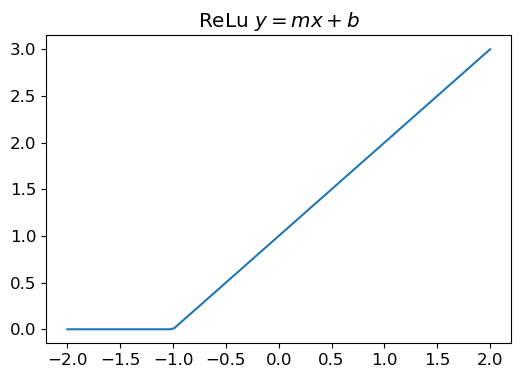

In [158]:
def relu(x,m,b):
    y = m*x+b
    return torch.clip(y,0.)

relu_partial = partial(relu,1,1)

plot_function(relu_partial, title="ReLu $y=mx+b$")

Lets make it interactive again with altair & matplotlib so you can muck around on the blog as well as in the notebook

In [159]:
@interact(m=1.0, b=1.5)
def plot_relu(m,b):
    plot_function(partial(relu,m,b), title="ReLu $y=mx+b$")

interactive(children=(FloatSlider(value=1.0, description='m', max=3.0, min=-1.0), FloatSlider(value=1.5, descr…

For my Quarto friends....

In [209]:
m,b = 1.5,1.5

x = torch.linspace(-2,2,50)
y=relu_partial(x)

selector_m =  alt.selection_single(name="selector_m", 
                                fields=['m'],
                                bind=alt.binding_range(min=0, max=3, step=0.1, name='M'),
                                init={'m': m}) 
selector_b = alt.selection_single(name="selector_b",
                                fields=['b'], 
                                bind=alt.binding_range(min=0, max=3, step=0.1, name='B'),
                                init={'b': b})
# selector_c = alt.selection_single(name="selector_c",
#                                 fields=['c'], 
#                                 bind=alt.binding_range(min=0, max=3, step=0.1, name='C'),
#                                 init={'c': c})

data = pd.DataFrame({"x":x.numpy(),"y":y})

line = alt.Chart(data=data,title="ReLu y = mx + b").mark_line(color="red").encode(
    x='x:Q',
    y='y:Q',
).transform_calculate(y=f"max(0,(selector_m.m * datum.x) + {b})").properties(title="y = mx+b").add_selection(selector_m)

line

alt.Chart(...)

Similar to the quadratic, I can't seem to get the bias term which changes the intercept to interact nicely with the transform_calculate function of altair but you can see how playing with the 'm' term changes partly the steepness of the slope up as well as where the curve starts its ascent from 0 where its been clipped. Again, highly recommend bringing the notebook from my github over to colab but hopefully there's enough interactivity that it sinks in what we're playing with.

Lets now make a double ReLu which lets us connect two of these units together.

In [224]:
def double_relu(m1,b1,m2,b2,x): return relu(x,m1,b1) + relu(x,m2,b2)

In [228]:
@interact(m1=-1.5,b1=-1.5,m2=1.5,b2=1.5)
def plot_double_relu(m1,b1,m2,b2):plot_function(partial(double_relu,m1,b1,m2,b2))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…

Once again for my Quarto friends, forgive me for the lack of b1/b2 bias terms, you can still get the point with the m1 and m2 values how you can make any kind of point and direction that you need.

In [244]:
m1,b1, m2, b2 = -1.5,-1.5,3,3

x = torch.linspace(-2,2,50)
f = partial(double_relu,m1,b1,m2,b2)
y= f(x)

selector_m =  alt.selection_single(name="selector_m", 
                                fields=['m1'],
                                bind=alt.binding_range(min=-3, max=3, step=0.1, name='M1'),
                                init={'m1': m1}) 
selector_b = alt.selection_single(name="selector_b",
                                fields=['b1'], 
                                bind=alt.binding_range(min=-3, max=3, step=0.1, name='B'),
                                init={'b1': b1})
selector_mm =  alt.selection_single(name="selector_mm", 
                                fields=['m2'],
                                bind=alt.binding_range(min=-3, max=3, step=0.1, name='M2'),
                                init={'m2': m2}) 
selector_bb = alt.selection_single(name="selector_bb",
                                fields=['b2'], 
                                bind=alt.binding_range(min=-3, max=3, step=0.1, name='B'),
                                init={'b12': b2})

data = pd.DataFrame({"x":x.numpy(),"y":y})

line = alt.Chart(data=data,title="Double ReLu y = (mx + b) + (mx+b)").mark_line(color="red").encode(
    x='x:Q',
    y='y:Q',
).transform_calculate(y=f"(max(0,(selector_m.m1 * datum.x) + {b1})) + (max(0,(selector_mm.m2 * datum.x) + {b2}))").properties(title="y = mx+b").add_selection(selector_m).add_selection(selector_mm)

line

alt.Chart(...)

### Draw the Owl Problem

**"At this point, we have the ability to draw an elbow/squiggle, if we connect enough of these elbows and squiggles together, we can approximate/fit any function in existence given enough elbows."**

As mentioned by Jeremy, we run into the the 'draw the rest of the owl problem'. This fact seems rediculous, this is an important essence of deep learning and we've established every foundational peice of this 'magic'. Its absolutely mind blowing (to me at least) that this is the underlying mechanics of the kind of software that detects cancers and shazam's the song you're listening to.

![Draw the Rest of the Owl Meme](https://pbs.twimg.com/media/Bs13i6LCcAAvwCf.jpg)

Everything further in deep learning are tricks, methods, strategies, ideas, and efficient ways to play around and build upon this simple concept, honestly astonishing. It doesn't quite feel real to me but I can see Jeremy's point, given enough squiggles you could make any shape imaginable, with our ability to create a loss function and update our parameters accordingly, we can also automatically find the right values given we have enough squiggles which is a product of our model architecture.

How do we do all this efficiently, in comes matrix calculations which allows us to combine a whole bunch of parameters multiplied by a whole bunch of other input values that we're feeding them.

### Matrix Calculations

[Jeremy walks through an awesome site](http://matrixmultiplication.xyz/) that visually shows how matrix multiplication works. This really helps sink in how the process works, I think its naturally confusing because you have to have two matrices (tensors in our case) of different shapes and you topple one over on the side and slide it over like a window in order to multiply it by the other matrix as the website shows.

Lets replicate the matrices (tensors) in python and step through each of the multiplications one by one to see how we arrive at our final tensor (matrix).

In [263]:
a = torch.tensor([[1,2,1],
                  [0,1,1],
                  [2,3,1]])

x = torch.tensor([[2,5],
                  [6,7],
                  [1,8]])

a,x

(tensor([[1, 2, 1],
         [0, 1, 1],
         [2, 3, 1]]),
 tensor([[2, 5],
         [6, 7],
         [1, 8]]))

Ok so we've got two tensors, one which is 3x3 (rows x columns) and the other which is 3x2, if we multiply them together we will yield a 3x2 tensor.

Lets also checkout the docs for pytorch's matrix multiplication method which is torch.mm()

In [265]:
torch.mm?

Docstring:
mm(input, mat2, *, out=None) -> Tensor

Performs a matrix multiplication of the matrices :attr:`input` and :attr:`mat2`.

If :attr:`input` is a :math:`(n \times m)` tensor, :attr:`mat2` is a
:math:`(m \times p)` tensor, :attr:`out` will be a :math:`(n \times p)` tensor.

.. note:: This function does not :ref:`broadcast <broadcasting-semantics>`.
          For broadcasting matrix products, see :func:`torch.matmul`.

Supports strided and sparse 2-D tensors as inputs, autograd with
respect to strided inputs.

This operation has support for arguments with :ref:`sparse layouts<sparse-docs>`.
If :attr:`out` is provided it's layout will be used. Otherwise, the result
layout will be deduced from that of :attr:`input`.


.. warning::
    Sparse support is a beta feature and some layout(s)/dtype/device combinations may not be supported,
    or may not have autograd support. If you notice missing functionality please
    open a feature request.

This operator supports :ref:`TensorFloat

And lets run our matrix multiplication to see the result.

In [249]:
torch.mm(a,x)

tensor([[15, 27],
        [ 7, 15],
        [23, 39]])

Awesome, looks just like the website demonstrated.

As we tip the x tensor on its side to match the width of tensor a, our first set of calculations are ((2x1) + (6x2) + (1x1)) = 15. We can see the python indexation equivalent below which helps match up mentally how these calculations are done.

In [260]:
f"({x[0,0]} x {a[0,0]}) + ({x[1,0]} x {a[0,1]}) + ({x[2,0]} x {a[0,2]})"

'(2 x 1) + (6 x 2) + (1 x 1)'

This gives us our first result of our output tensor which is '15', which we can see at the 0,0 index of our result.

We then slide the 'x' tensor down one so we've now got two 'window' rows to calculate.

We run the first row of calculations which is (5x1) + (7x2) + (8x1) = 27, again we can check the indexation in python and our result ends up in the 0,1 position of our output tensor

In [262]:
f"({x[0,1]} x {a[0,0]}) + ({x[1,1]} x {a[0,1]}) + ({x[2,1]} x {a[0,2]})"

'(5 x 1) + (7 x 2) + (8 x 1)'

At the same time we're also calculating the second row of (2x0) + (6x1) + (1x1) = 7 as our first 'column' of our x tensor is now being calculated against the second 'row' of our 'a' tensor. This output is stored at the 1,0 indexation of our output tensor.

In [268]:
f"({x[0,0]} x {a[1,0]}) + ({x[1,0]} x {a[1,1]}) + ({x[2,0]} x {a[1,2]})"

'(2 x 0) + (6 x 1) + (1 x 1)'

Ok, I'm hoping that very explicit example in python in combination with the matrix multiplication website has knuckled down the laborious task of doing matrix multiplications. Thankfully as we saw, torch does all the magic and we don't have to do this hand-written work but scribing this down really matches up the theory with the python indexation vernacular so that they are welded together in my mind and I feel comfortable explaining the concept as well as demonstrating the mechanics of the interactions between the tensors.

I did wonder what happens if the tensors are mis-shapen, so lets just add an extra row to our x tensor so that the 3 columns of tensor 'a' don't match up to the 3 'rows' of our x tensor.

In [269]:
a = torch.tensor([[1,2,1],
                  [0,1,1],
                  [2,3,1]])

x = torch.tensor([[2,5],
                  [6,7],
                  [1,8],
                  [100,100]])

torch.mm(a,x)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x3 and 4x2)

Turns out you can't, how bout that!

I'm guessing you can add infinite rows to tensor 'a' however since the 'windowing' process doesn't change as the 3 'a' columns x 3 'x' rows match still works and there's simply more windowing to be done.

In [270]:
a = torch.tensor([[1,2,1],
                  [0,1,1],
                  [2,3,1],
                  [100,100,100],
                  [200,200,200],
                  [300,300,300]])

x = torch.tensor([[2,5],
                  [6,7],
                  [1,8]])

torch.mm(a,x)

tensor([[  15,   27],
        [   7,   15],
        [  23,   39],
        [ 900, 2000],
        [1800, 4000],
        [2700, 6000]])

Cool, looks like that still functions fine, good to try these things out. I wondered if the 'x' tensor with its 4th row would just result in a (100x0) operation since there is nothing in tensor 'a' at that indexation (since it doesn't exist) but it looks like you'd simply have to reshape tensor 'a' and fill a value of 0 if you wanted that operation to happen.

### Deep Learning with Excel

At this point in the lecture (1:04:22), Jeremy builds a deep learning model in excel, which is absolutely insane and proves to me he just operates on another vibrational level, plane, existence, whatever you want to call it. Who gets up in the morning and thinks of doing deep learning in excel?! Then again, he's got some deep (pun not indended but very much enjoyed) programming roots in APL and S which are kind of the roots of excel and Jeremy was doing deep learning in the 90s so it doesn't surprise me he natively thinks in this array programming style. Who knew consultants, accountants, etc are all just huge functional programming fans, the OOP vs functional factional wars continue and people don't even know they're fighting the war.

That being said, its super cool, its a great demonstration of how it really is these fundamental calculations that we've done by hand which produce the deep learning outcomes we're seeing.

## Book Content